In [308]:
!conda install -c anaconda beautifulsoup4

Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
beautifulsoup4            4.6.3                    py35_0    anaconda


In [309]:
!conda install -c anaconda lxml

Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
lxml                      4.2.5            py35hefd8a0e_0    anaconda


In [310]:
!conda install -c anaconda requests

Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
requests                  2.19.1                   py35_0    anaconda


# Website Scraping and Transforming Data

In [311]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import csv

In [312]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text

In [313]:
soup = BeautifulSoup(source, 'lxml')

In [314]:
table = soup.find_all('table')[0]

In [315]:
# import this HTML table in a DataFrame
dfs = pd.read_html(str(table), header = 0)

In [316]:
# function read_html always returns a list of DataFrame objects
df = dfs[0]

In [317]:
# renaming of columns headers
df.columns = ['PostalCode', 'Borough', 'Neighborhood']

In [318]:
# Remove Boroughs that are not assigned
df = df[df['Borough'] != 'Not assigned']

In [319]:
# copying the Borough name onto Neighborhood only if Neighborhood name is not assigned
df['Neighborhood'] = df['Borough'].where(df['Neighborhood'] == 'Not assigned', df['Neighborhood'])
# or can do this >>> df['Neighborhood'] = np.where(df['Neighborhood'] == 'Not assigned', df['Borough'], df['Neighborhood'])

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [320]:
# join all neighborhoods with the same postalcode and borough
grouped = df.groupby(['PostalCode', 'Borough'])['Neighborhood'].apply(lambda x: ', '.join(x))

# convert a groupby object to dataframe
grouped.reset_index()

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In [321]:
df_nbh = pd.DataFrame(grouped)
dfnbh = df_nbh.reset_index()
dfnbh.head()

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


# Geocoding PostalCode

In [322]:
# insert geospatial data via Geocoder Python package
# import geocoder

# # initialize your variable to None
# lat_lng_coords = None

# # loop until you get the coordinates
# while(lat_lng_coords is None):
#   g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
#   lat_lng_coords = g.latlng

# latitude = lat_lng_coords[0]
# longitude = lat_lng_coords[1]

In [323]:
# insert geospatial data via uploaded csv file

In [324]:
# The code was removed by Watson Studio for sharing.

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [325]:
df_merged = pd.merge(left=dfnbh, right=geo, left_on='PostalCode', right_on='Postal Code', how='left')
df_merged.head()

,PostalCode,Borough,Neighborhood,Postal Code,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",M1B,43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",M1C,43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",M1E,43.763573,-79.188711
3,M1G,Scarborough,Woburn,M1G,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,M1H,43.773136,-79.239476


In [326]:
df_merged.drop(['Postal Code'], axis=1, inplace=True)
df_merged.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


# Visualisation on a Map

In [327]:
!conda install -c conda-forge folium=0.5.0 --yes

Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
folium                    0.5.0                      py_0    conda-forge


In [328]:
!conda install -c conda-forge geopy --yes

Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
geopy                     1.18.1                     py_0    conda-forge


In [329]:
import folium # map rendering library
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

### Create a map of Toronto with Boroughs superimposed on top

In [330]:
# removing Boroughs that does not contain the word "Toronto" in it, reduce data size
# creating a new dataframe 
df_toronto = dfnbh[dfnbh['Borough'].str.contains('Toronto')]

In [331]:
df_merged2 = pd.merge(left=df_toronto, right=geo, left_on='PostalCode', right_on='Postal Code', how='left')
df_merged2.head()

,PostalCode,Borough,Neighborhood,Postal Code,Latitude,Longitude
0,M4E,East Toronto,The Beaches,M4E,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West, Riverdale",M4K,43.679557,-79.352188
2,M4L,East Toronto,"The Beaches West, India Bazaar",M4L,43.668999,-79.315572
3,M4M,East Toronto,Studio District,M4M,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,M4N,43.728020,-79.388790


In [332]:
df_merged2.drop(['Postal Code'], axis=1, inplace=True)
df_merged2.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


In [333]:
df_merged2.shape

(38, 5)

In [334]:
# find out the latitude and longitude of Toronto
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="ca_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [335]:
# create map of Manhattan using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df_merged2['Latitude'], df_merged2['Longitude'], df_merged2['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

# Explore Venues around Postal Codes in Toronto

In [336]:
# Foursquare Credentials Definition

In [337]:
# The code was removed by Watson Studio for sharing.

In [338]:
# function that extracts the category of the venue from Foursqure json response
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [339]:
# function to find out venues around postal codes with categories, lat, lng

# Limit to 100 per postalcode
LIMIT = 100

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue, clean json and structure it into a pandas df
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [340]:
# run above function on each boroughs and create a new df called toronto_venues
toronto_venues = getNearbyVenues(names=df_merged2['PostalCode'],
                                   latitudes=df_merged2['Latitude'],
                                   longitudes=df_merged2['Longitude']
                                  )

M4E
M4K
M4L
M4M
M4N
M4P
M4R
M4S
M4T
M4V
M4W
M4X
M4Y
M5A
M5B
M5C
M5E
M5G
M5H
M5J
M5K
M5L
M5N
M5P
M5R
M5S
M5T
M5V
M5W
M5X
M6G
M6H
M6J
M6K
M6P
M6R
M6S
M7Y


In [341]:
# check size of resulting df
print(toronto_venues.shape)
toronto_venues.head()

(1689, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,M4E,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
1,M4E,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
2,M4E,43.676357,-79.293031,Starbucks,43.678798,-79.298045,Coffee Shop
3,M4E,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,M4K,43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant


In [342]:
# check how many venues were returned for each postal code
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
M4E,4,4,4,4,4,4
M4K,43,43,43,43,43,43
M4L,20,20,20,20,20,20
M4M,39,39,39,39,39,39
M4N,3,3,3,3,3,3
M4P,10,10,10,10,10,10
M4R,19,19,19,19,19,19
M4S,34,34,34,34,34,34
M4T,3,3,3,3,3,3


In [343]:
# find out how many unique categories that can be curated from all the returned values
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 236 uniques categories.


# Analysis of Postal Codes

In [344]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

In [345]:
toronto_onehot.drop(['Neighborhood'], axis=1, inplace=True)

In [346]:
# add Postal Code column back to dataframe at position 0 (in front)
toronto_onehot.insert(0, 'Neighborhood', toronto_venues['Neighborhood'])

In [347]:
toronto_onehot.head()

,Neighborhood,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,M4E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M4E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,M4E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,M4E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M4K,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [348]:
# group rows by neighborhood and take the mean of the frequency of occurrence of each category
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,M4E,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
1,M4K,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023256,...,0.023256,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.023256
2,M4L,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
3,M4M,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051282,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.025641
4,M4N,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
5,M4P,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
6,M4R,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.052632
7,M4S,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
8,M4T,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
9,M4V,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,...,0.000000,0.00,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.00,0.000000


In [349]:
toronto_grouped.shape

(38, 236)

In [350]:
# print each neighborhood along with the top 5 most common venues
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----M4E----
               venue  freq
0  Health Food Store  0.25
1                Pub  0.25
2        Coffee Shop  0.25
3     Adult Boutique  0.00
4       Noodle House  0.00


----M4K----
                venue  freq
0    Greek Restaurant  0.23
1         Coffee Shop  0.09
2      Ice Cream Shop  0.07
3  Italian Restaurant  0.05
4           Bookstore  0.05


----M4L----
            venue  freq
0            Park  0.10
1         Brewery  0.05
2    Liquor Store  0.05
3  Sandwich Place  0.05
4      Steakhouse  0.05


----M4M----
                 venue  freq
0                 Café  0.10
1          Coffee Shop  0.08
2   Italian Restaurant  0.05
3            Gastropub  0.05
4  American Restaurant  0.05


----M4N----
                     venue  freq
0                     Park  0.33
1              Swim School  0.33
2                 Bus Line  0.33
3           Adult Boutique  0.00
4  New American Restaurant  0.00


----M4P----
            venue  freq
0           Hotel   0.2
1  Breakfast Spot   0.1


In [351]:
# write a function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [352]:
# reate the new dataframe and display the top 10 venues for each neighborhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E,Health Food Store,Coffee Shop,Pub,Diner,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store
1,M4K,Greek Restaurant,Coffee Shop,Ice Cream Shop,Bookstore,Italian Restaurant,Yoga Studio,Cosmetics Shop,Brewery,Bubble Tea Shop,Restaurant
2,M4L,Park,Intersection,Pet Store,Coffee Shop,Pub,Movie Theater,Sandwich Place,Burrito Place,Burger Joint,Brewery
3,M4M,Café,Coffee Shop,Bakery,Gastropub,Italian Restaurant,American Restaurant,Bookstore,Fish Market,Juice Bar,Clothing Store
4,M4N,Park,Swim School,Bus Line,Yoga Studio,Discount Store,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store


# Finding the best K Value

In [353]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

In [354]:
# scale the continuous features
mms = MinMaxScaler()
mms.fit(toronto_grouped_clustering)
toronto_grouped_clustering_transformed = mms.transform(toronto_grouped_clustering)

In [355]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(toronto_grouped_clustering_transformed)
    Sum_of_squared_distances.append(km.inertia_)

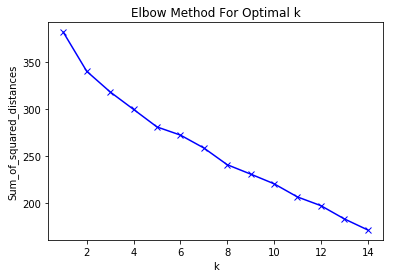

In [356]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# Clustering Postal Codes

In [357]:
# Run k-means to cluster the neighborhood into 5 clusters
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_ 

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [358]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [359]:
toronto_merged = df_merged2

In [360]:
neighborhoods_venues_sorted.set_index('Neighborhood')

,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Neighborhood,,,,,,,,,,,
M4E,0,Health Food Store,Coffee Shop,Pub,Diner,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store
M4K,0,Greek Restaurant,Coffee Shop,Ice Cream Shop,Bookstore,Italian Restaurant,Yoga Studio,Cosmetics Shop,Brewery,Bubble Tea Shop,Restaurant
M4L,0,Park,Intersection,Pet Store,Coffee Shop,Pub,Movie Theater,Sandwich Place,Burrito Place,Burger Joint,Brewery
M4M,0,Café,Coffee Shop,Bakery,Gastropub,Italian Restaurant,American Restaurant,Bookstore,Fish Market,Juice Bar,Clothing Store
M4N,0,Park,Swim School,Bus Line,Yoga Studio,Discount Store,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store
M4P,0,Hotel,Burger Joint,Gym,Breakfast Spot,Park,Sandwich Place,Clothing Store,Dance Studio,Food & Drink Shop,Yoga Studio
M4R,0,Coffee Shop,Clothing Store,Sporting Goods Shop,Yoga Studio,Bagel Shop,Gym / Fitness Center,Chinese Restaurant,Dessert Shop,Rental Car Location,Diner
M4S,0,Sandwich Place,Pizza Place,Dessert Shop,Restaurant,Café,Coffee Shop,Italian Restaurant,Sushi Restaurant,Gym,Fried Chicken Joint
M4T,2,Playground,Gym,Tennis Court,Yoga Studio,Diner,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store


In [361]:
# # merge toronto_grouped with toronto_data(df_merged2) to add latitude/longitude for each neighborhood
toronto_merged = pd.merge(left=toronto_merged, right=neighborhoods_venues_sorted, left_on='PostalCode', right_on='Neighborhood', how='left')
toronto_merged.head()

,PostalCode,Borough,Neighborhood_x,Latitude,Longitude,Cluster Labels,Neighborhood_y,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,M4E,Health Food Store,Coffee Shop,Pub,Diner,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,0,M4K,Greek Restaurant,Coffee Shop,Ice Cream Shop,Bookstore,Italian Restaurant,Yoga Studio,Cosmetics Shop,Brewery,Bubble Tea Shop,Restaurant
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572,0,M4L,Park,Intersection,Pet Store,Coffee Shop,Pub,Movie Theater,Sandwich Place,Burrito Place,Burger Joint,Brewery
3,M4M,East Toronto,Studio District,43.659526,-79.340923,0,M4M,Café,Coffee Shop,Bakery,Gastropub,Italian Restaurant,American Restaurant,Bookstore,Fish Market,Juice Bar,Clothing Store
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,0,M4N,Park,Swim School,Bus Line,Yoga Studio,Discount Store,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store


In [362]:
# visualize the resulting clusters
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, nei, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['PostalCode'], toronto_merged['Neighborhood_x'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster: ' + str(cluster) + ' Neighborhood(s): ' + str(nei), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Examine Cluster

In [363]:
# cluster 1
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,Neighborhood_y,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,East Toronto,0,M4E,Health Food Store,Coffee Shop,Pub,Diner,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store
1,East Toronto,0,M4K,Greek Restaurant,Coffee Shop,Ice Cream Shop,Bookstore,Italian Restaurant,Yoga Studio,Cosmetics Shop,Brewery,Bubble Tea Shop,Restaurant
2,East Toronto,0,M4L,Park,Intersection,Pet Store,Coffee Shop,Pub,Movie Theater,Sandwich Place,Burrito Place,Burger Joint,Brewery
3,East Toronto,0,M4M,Café,Coffee Shop,Bakery,Gastropub,Italian Restaurant,American Restaurant,Bookstore,Fish Market,Juice Bar,Clothing Store
4,Central Toronto,0,M4N,Park,Swim School,Bus Line,Yoga Studio,Discount Store,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store
5,Central Toronto,0,M4P,Hotel,Burger Joint,Gym,Breakfast Spot,Park,Sandwich Place,Clothing Store,Dance Studio,Food & Drink Shop,Yoga Studio
6,Central Toronto,0,M4R,Coffee Shop,Clothing Store,Sporting Goods Shop,Yoga Studio,Bagel Shop,Gym / Fitness Center,Chinese Restaurant,Dessert Shop,Rental Car Location,Diner
7,Central Toronto,0,M4S,Sandwich Place,Pizza Place,Dessert Shop,Restaurant,Café,Coffee Shop,Italian Restaurant,Sushi Restaurant,Gym,Fried Chicken Joint
9,Central Toronto,0,M4V,Coffee Shop,Pub,American Restaurant,Light Rail Station,Sports Bar,Supermarket,Sushi Restaurant,Bagel Shop,Restaurant,Fried Chicken Joint
11,Downtown Toronto,0,M4X,Coffee Shop,Restaurant,Park,Pub,Bakery,Café,Pizza Place,Italian Restaurant,Diner,Indian Restaurant


In [364]:
# cluster 2
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,Neighborhood_y,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Central Toronto,1,M5N,Garden,Yoga Studio,Discount Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant


In [365]:
# cluster 3
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,Neighborhood_y,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Central Toronto,2,M4T,Playground,Gym,Tennis Court,Yoga Studio,Diner,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store


In [366]:
# cluster 4
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,Neighborhood_y,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Downtown Toronto,3,M4W,Park,Playground,Trail,Diner,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store


In [367]:
# cluster 5
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,Neighborhood_y,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,Central Toronto,4,M5P,Mexican Restaurant,Trail,Sushi Restaurant,Jewelry Store,Yoga Studio,Discount Store,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant
